# Minimum spanning tree

Many networks are surprisingly sparse, with most nodes having only a few connections, in part because connections are costly.
Like cables in power grids and human-to-human communications, networks are often built with cost constraints, and it is often of a great interest to find the most cost-effective structure.

**Minimum spanning tree** is a tree that connects all the nodes in a network with the minimum total weight of edges.
The term involves the following two concepts:

- **Tree**: A network is a tree if it is connected and has no cycles.
- **Spanning tree**: A spanning tree is a tree that spans all the nodes in a network.

The minimum spanning tree may not be unique, meaning there can be multiple spanning trees with the same minimum total weight of edges for a network.

:::{figure-md} minimum-spanning-tree
<img src="../figs/minimum-spanning-tree.jpg" alt="Minimum spanning tree" width="80%">

Minimum spanning tree of a network.
:::

## How to find the minimum spanning tree

**Kruskal's algorithm** and **Prim's algorithms** are two common methods to find a minimum spanning tree.
Both start with an empty edge set and add the smallest weight edge iteratively, while ensuring that the edges form a tree, until all nodes are included.
The difference between the two algorithms lies in the order of edge addition.

**Kruskal's algorithm** operates as follows:
1. Sort the edges by *the increasing order of the edge weights*.
2. Select the edge with the smallest weight that does not form a cycle with the edges already in the tree.
3. Repeat step 2 until all the nodes are connected.

**Prim's algorithm**:
1. Start with a singleton network $G$ consisting of a randomly chosen node.
2. Add the smallest weight edge connecting $G$ to a node not in $G$.
3. Repeat step 2 until all nodes are connected.

{{ '[🚀 Check out the Demo for Kruskal\'s and Prim\'s algorithm 🌐]( BASE_URL/vis/kruskal-vs-prime.html)'.replace('BASE_URL', base_url) }}

Kruskal's algorithm sorts the edges globally at the beginning, while Prim's algorithm sorts the edges locally at each step.
Both algorithms find the same minimum spanning tree, provided that all edge weights are distinct.
Otherwise, they may yield different trees.

## Code

`igraph` provides a function `igraph.Graph.spanning_tree` to find a minimum spanning tree in a given network.

Let's first create a network with random edge weights.

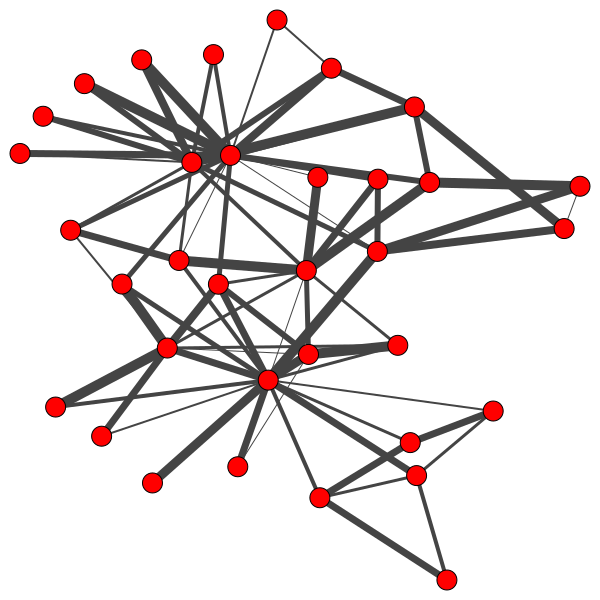

In [1]:
import igraph
import random

g = igraph.Graph.Famous('Zachary')
g.es["weight"] = [random.randint(1, 10) for _ in g.es]
igraph.plot(g, edge_width = g.es["weight"])

:::{note}
[Zachary's karate club](https://en.wikipedia.org/wiki/Zachary%27s_karate_club) is a famous network of 34 members of a karate club and documents of their links between friends.
The network is undirected and unweighted.
:::

The minimum spanning tree of the network can be found by the following code.

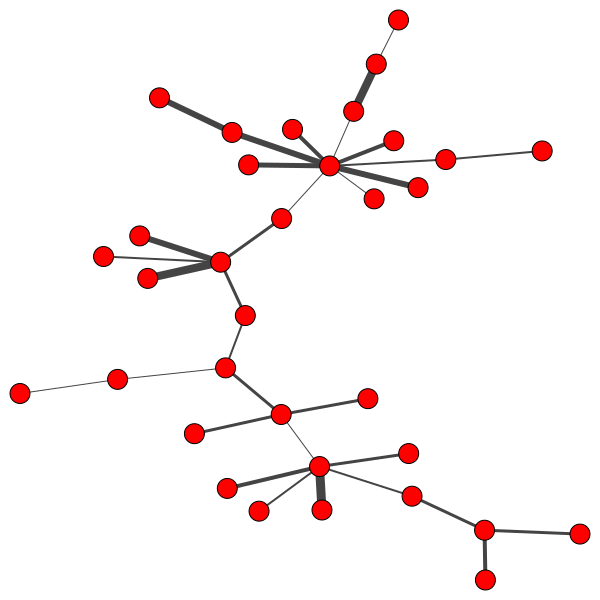

In [2]:
gmst = g.spanning_tree(weights=g.es["weight"]) # If not `weights` are not specified, the edges are assumed to be unweighted
igraph.plot(gmst, edge_width = gmst.es["weight"])